## 1. Data EDA

In [105]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler

In [110]:
wines = pd.read_csv('winequalityN.csv')

In [111]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [112]:
wines.shape

(6497, 13)

In [113]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [114]:
wines.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [115]:
wines['quality_label'] = wines.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')

In [116]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [117]:
wines.quality_label.value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

In [118]:
wines.dropna().quality_label.value_counts()

medium    3894
low       2372
high       197
Name: quality_label, dtype: int64

In [120]:
#As we can notice we are losing only total of 34 data records (0,5%)with the following details: 1 record of high, 12 of low and 21 of medium

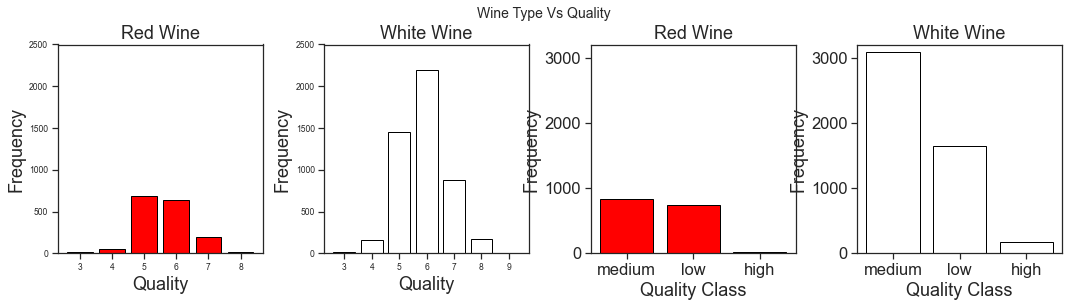

In [121]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Vs Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = wines.quality[wines.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = wines.quality[wines.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = wines.quality_label[wines.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = wines.quality_label[wines.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', edgecolor='black', linewidth=1, tick_label =ww_q[0])

### descriptive statistics by type

In [123]:
subset_attributes = wines.columns
rs = round(wines.loc[wines.type == 'red', subset_attributes].describe(),2)
ws = round(wines.loc[wines.type == 'white', subset_attributes].describe(),2)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1597.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1598.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1598.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1597.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1597.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4890.0    6.86   0.84   
volatile acidity       0.64    1.58                4891.0    0.28   0.10   
citric acid            0.42    1.00                4896.0    0.33   0.12   
residual sugar         2.60   15.50                4896.0    6.39   5.07   
chlorides              0.09    0.61                4896.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4891.0    3.19   0.15   
sulphates              0.73    2.00                4896.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

### descriptive statistics by quality

In [125]:
#subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=0, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine']).T

Low Quality Wine                                      \
                                count    mean    std   min    25%     50%   
fixed acidity                  2379.0    7.33   1.27  4.20   6.50    7.10   
volatile acidity               2382.0    0.40   0.19  0.10   0.26    0.34   
citric acid                    2383.0    0.30   0.16  0.00   0.21    0.29   
residual sugar                 2384.0    5.65   4.92  0.60   1.80    2.90   
chlorides                      2383.0    0.06   0.04  0.01   0.04    0.05   
free sulfur dioxide            2384.0   29.48  19.84  2.00  14.00   26.00   
total sulfur dioxide           2384.0  119.28  61.89  6.00  68.00  124.00   
density                        2384.0    1.00   0.00  0.99   0.99    1.00   
pH                             2381.0    3.21   0.16  2.74   3.11    3.20   
sulphates                      2382.0    0.52   0.14  0.25   0.44    0.50   
alcohol                        2384.0    9.87   0.84  8.00   9.30    9.60   
quality                        2384.0    4.88   0.36  3.00   5.00    5.00   

                                     Medium Quality Wine          ...          \
                         75%     max               count    mean  ...     75%   
fixed acidity           7.80   15.90              3911.0    7.16  ...    7.60   
volatile acidity        0.50    1.58              3909.0    0.31  ...    0.36   
citric acid             0.40    1.00              3913.0    0.33  ...    0.39   
residual sugar          8.52   23.50              3913.0    5.33  ...    7.90   
chlorides               0.08    0.61              3914.0    0.05  ...    0.06   
free sulfur dioxide    42.00  289.00              3915.0   30.96  ...   41.00   
total sulfur dioxide  167.00  440.00              3915.0  113.51  ...  150.00   
density                 1.00    1.00              3915.0    0.99  ...    1.00   
pH                      3.31    3.90              3909.0    3.22  ...    3.33   
sulphates               0.58    2.00              3913.0    0.54  ...    0.61   
alcohol                10.40   14.90              3915.0   10.81  ...   11.70   
quality                 5.00    5.00              3915.0    6.28  ...    7.00   

                             High Quality Wine                               \
                         max             count    mean    std    min    25%   
fixed acidity          15.60             197.0    6.85   1.15   3.90   6.20   
volatile acidity        1.04             198.0    0.29   0.12   0.12   0.21   
citric acid             1.66             198.0    0.33   0.10   0.03   0.28   
residual sugar         65.80             198.0    5.35   4.16   0.80   2.00   
chlorides               0.42             198.0    0.04   0.02   0.01   0.03   
free sulfur dioxide   112.00             198.0   34.51  17.08   3.00  24.00   
total sulfur dioxide  294.00             198.0  117.48  41.69  12.00  96.00   
density                 1.04             198.0    0.99   0.00   0.99   0.99   
pH                      4.01             198.0    3.23   0.16   2.88   3.13   
sulphates               1.95             198.0    0.51   0.16   0.25   0.38   
alcohol                14.20             198.0   11.69   1.27   8.50  11.00   
quality                 7.00             198.0    8.03   0.16   8.00   8.00   

                                              
                         50%     75%     max  
fixed acidity           6.80    7.30   12.60  
volatile acidity        0.28    0.35    0.85  
citric acid             0.32    0.37    0.74  
residual sugar          4.05    7.57   14.80  
chlorides               0.04    0.04    0.12  
free sulfur dioxide    34.00   43.00  105.00  
total sulfur dioxide  118.50  145.00  212.50  
density                 0.99    0.99    1.00  
pH                      3.23    3.33    3.72  
sulphates               0.48    0.60    1.10  
alcohol                12.00   12.60   14.00  
quality                 8.00    8.00    9.00  

[12 rows x 24 columns]

### Check for correlations based on wines types

In [127]:
# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=101).reset_index(drop=True)

class_tp = LabelEncoder()
y_tp = class_tp.fit_transform(wines.type.values) # 1 - White; 0 - Red
wines['color'] = y_tp

class_ql = {'low':0, 'medium': 1, 'high': 2}
y_ql = wines.quality_label.map(class_ql)

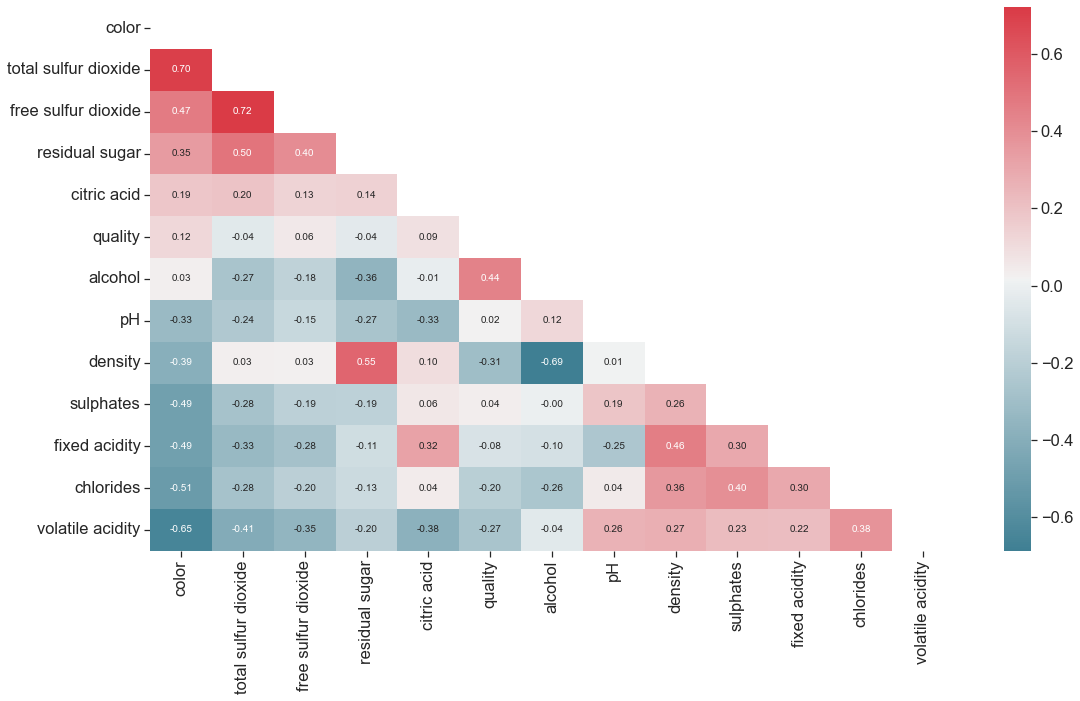

In [128]:
corr = wines.corr()
top_corr_cols = corr.color.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()
del corr, dropSelf, top_corr

### Check for correlations based on wines quality labels

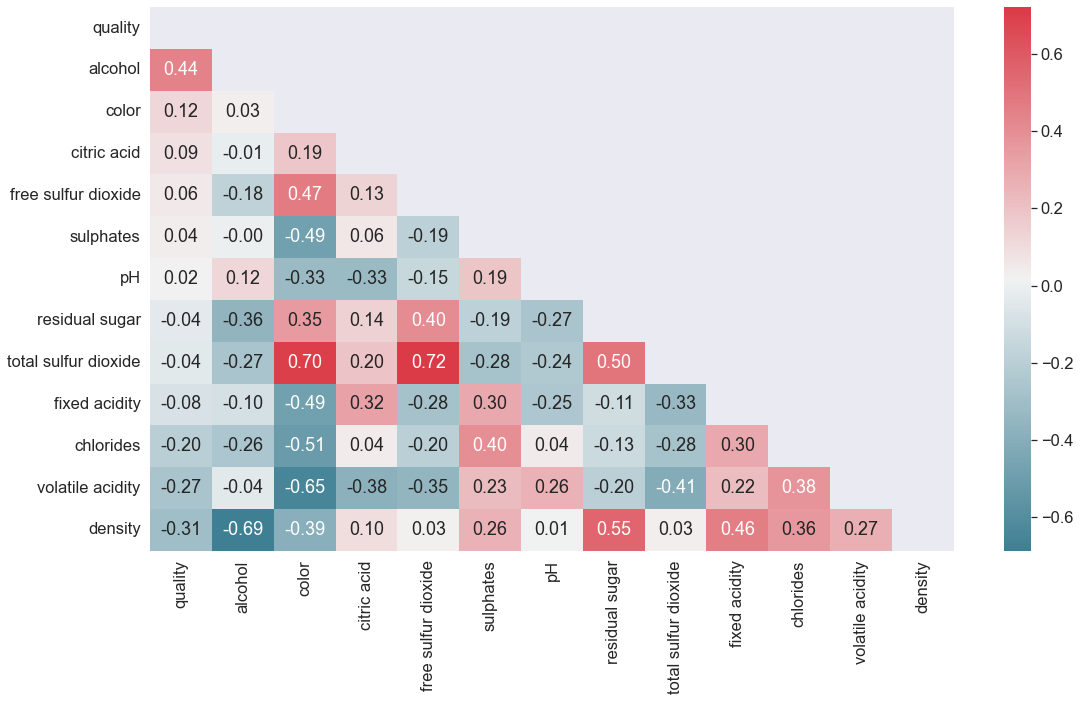

In [129]:
corr = wines.corr()
top_corr_cols = corr.quality.sort_values(ascending=False).keys() 
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)

### Relation of wine quality and their acohol

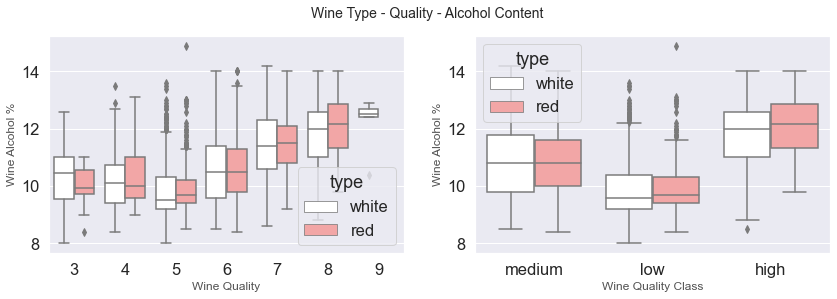

In [130]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x='quality', y='alcohol', hue='type', data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x='quality_label', y='alcohol', hue='type', data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
plt.show()

### relationships between wine types, quality and acidity:

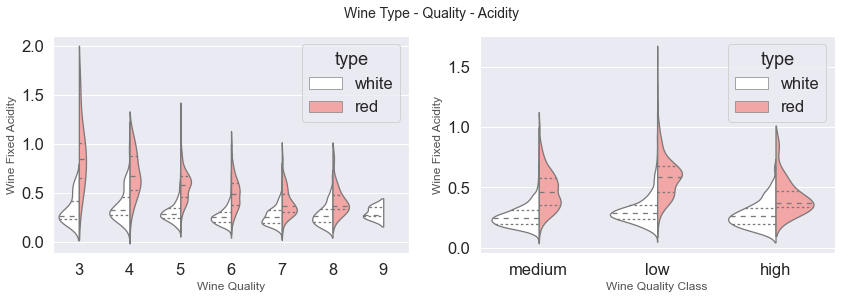

In [132]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x='quality', y='volatile acidity', hue='type', data=wines, split=True, inner='quart', linewidth=1.3,
               palette={'red': '#FF9999', 'white': 'white'}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)

sns.violinplot(x='quality_label', y='volatile acidity', hue='type', data=wines, split=True, inner='quart', linewidth=1.3,
               palette={'red': '#FF9999', 'white': 'white'}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)
plt.show()

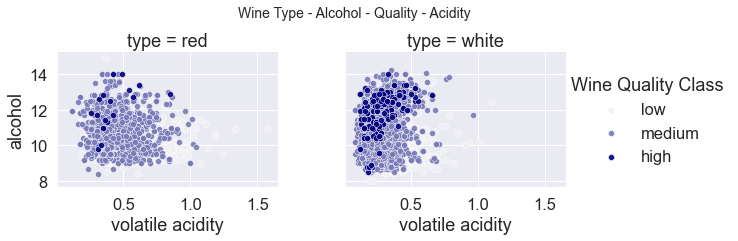

In [133]:
g = sns.FacetGrid(wines, col='type', hue='quality_label', col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, 'volatile acidity', 'alcohol', alpha=0.9, edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

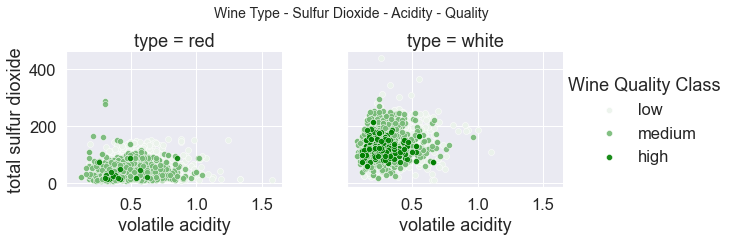

In [134]:
g = sns.FacetGrid(wines, col='type', hue='quality_label', col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('green', 3))
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

## 2. Data cleansing and preprocessing

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

import matplotlib.pylab as plt
import seaborn as sns 

import dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

In [107]:
wine = pd.read_csv('winequalityN.csv')

In [32]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [33]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Remove null values

In [34]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [35]:
wine.dropna(inplace=True)

In [36]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


### Renaming columns

In [37]:
wine.columns = [s.strip().replace(' ', '_') for s in wine.columns]
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

### Treating Categorical Variable

Show the categorical variable 'wine type' into 0 or 1

In [38]:
wine_dummy = pd.get_dummies(wine, prefix_sep='_', drop_first=True)
wine_dummy

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


### Normalization of variables

In [39]:
scaler=MinMaxScaler()
wine_norm=wine_dummy
wine_norm[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']] =  scaler.fit_transform(wine_norm[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
wine_norm

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_white
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,6,1
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,6,1
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,6,1
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6,1
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.247934,0.360000,0.048193,0.019939,0.098007,0.093750,0.073733,0.181222,0.542636,0.337079,0.217391,6,0
6492,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,5,0
6494,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,6,0
6495,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,5,0


### Correlation after data cleansing and normalization

<AxesSubplot:>

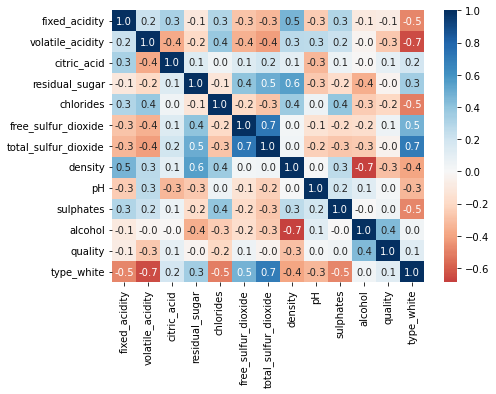

In [40]:
corr = wine_norm.corr()
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

## 3. Applying Machine Learning Algorithms

In [95]:
pip install fast-ml

In [96]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from fast_ml.model_development import train_valid_test_split

In [98]:
x = wine_norm.drop(columns=['quality'])
y = wine_norm['quality']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1)

print(train_x.shape), print(train_y.shape)
print(test_x.shape), print(test_y.shape)

(4524, 12)
(4524,)
(1939, 12)
(1939,)


(None, None)

### 3.1. Regression Tree

### 3.1.1. Regression Tree with grid search

In [100]:
# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Initial parameters: ', gridSearch.best_params_)
print('Initial score: ', gridSearch.best_score_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved parameters: ', gridSearch.best_params_)
print('Improved score: ', gridSearch.best_score_)

regTree = gridSearch.best_estimator_

regressionSummary(train_y, regTree.predict(train_x))
regressionSummary(test_y, regTree.predict(test_x))

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}
Initial score:  0.2812602179815973
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.001, 'min_samples_split': 15}
Improved score:  0.2865571438447344

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.6733
            Mean Absolute Error (MAE) : 0.5259
          Mean Percentage Error (MPE) : -1.4121
Mean Absolute Percentage Error (MAPE) : 9.3074

Regression statistics

                      Mean Error (ME) : -0.0316
       Root Mean Squared Error (RMSE) : 0.7475
            Mean Absolute Error (MAE) : 0.5763
          Mean Percentage Error (MPE) : -2.2020
Mean Absolute Percentage Error (MAPE) : 10.3983


### 3.1.2. Regression Tree with random forest

In [101]:
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=1000, random_state=1)

                 feature  importance       std
11            type_white    0.003408  0.002400
0          fixed_acidity    0.074131  0.008265
2            citric_acid    0.079505  0.009185
8                     pH    0.083687  0.009085
5    free_sulfur_dioxide    0.084500  0.008877
9              sulphates    0.085512  0.008906
3         residual_sugar    0.085533  0.009167
4              chlorides    0.085726  0.011436
6   total_sulfur_dioxide    0.091195  0.010166
1       volatile_acidity    0.100146  0.009925
7                density    0.100577  0.019522
10               alcohol    0.126082  0.020642


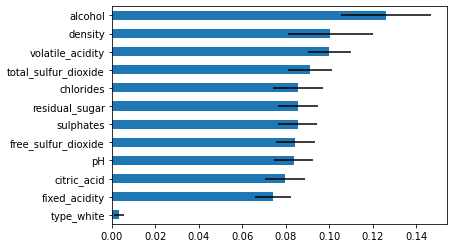

In [102]:
# variable (feature) importance plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_x.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()

#### Confusion matrix for validation set

In [103]:
classificationSummary(test_y, rf.predict(test_x))

Confusion Matrix (Accuracy 0.6870)

       Prediction
Actual   0   1   2   3   4   5   6
     0   0   0   5   3   0   0   0
     1   0  12  40  21   2   0   0
     2   0   0 471 171   7   0   0
     3   0   0 127 671  48   0   0
     4   0   0   6 131 162   0   0
     5   0   0   0  26  19  16   0
     6   0   0   0   0   1   0   0


### 3.1.3. Regression Tree with boosted trees

In [104]:
boost = GradientBoostingClassifier()
boost.fit(train_x, train_y)
classificationSummary(test_y, boost.predict(test_x))

Confusion Matrix (Accuracy 0.5941)

       Prediction
Actual   0   1   2   3   4   5   6
     0   0   3   3   2   0   0   0
     1   0   9  42  24   0   0   0
     2   3   6 413 217  10   0   0
     3   1   2 181 600  61   1   0
     4   0   1   7 170 119   2   0
     5   0   0   0  31  19  11   0
     6   0   0   0   0   1   0   0


### 3.2. KNN Analysis

In [41]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

In [135]:
wine_norm['quality_label'] = wine_norm.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')

In [137]:
wine_norm

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_white,quality_label
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,6,1,medium
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,6,1,medium
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,6,1,medium
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6,1,medium
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.247934,0.360000,0.048193,0.019939,0.098007,0.093750,0.073733,0.181222,0.542636,0.337079,0.217391,6,0,medium
6492,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,5,0,low
6494,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,6,0,medium
6495,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,5,0,low


#### Data partitioning with normalization

In [138]:
# training = 60%, test = 40%
# set random_state = 1

trainData, testData = train_test_split(wine_norm, test_size=0.40, random_state=1)
trainData.shape, testData.shape

print(trainData)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4093       0.231405          0.220000     0.162651        0.154908   0.167774   
5189       0.595041          0.080000     0.289157        0.021472   0.554817   
3812       0.338843          0.086667     0.234940        0.021472   0.079734   
6174       0.388430          0.213333     0.240964        0.087423   0.068106   
2311       0.264463          0.093333     0.156627        0.033742   0.044850   
...             ...               ...          ...             ...        ...   
927        0.239669          0.113333     0.198795        0.035276   0.079734   
5220       0.330579          0.360000     0.030120        0.026074   0.116279   
4006       0.132231          0.046667     0.192771        0.029141   0.046512   
243        0.247934          0.106667     0.204819        0.032209   0.063123   
5185       0.305785          0.213333     0.072289        0.036810   0.137874   

      free_sulfur_dioxide  

In [195]:
train_x1 = trainData[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
train_y1 = trainData['quality_label']
test_x1 = testData[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
test_y1 = testData['quality_label']

#### Use k-Nearest Neighbor(k=3)

In [196]:
knn = KNeighborsClassifier(n_neighbors=3).fit(train_x1,train_y1)
test_pred1 = knn.predict(test_x1)
print(test_pred1)
print(test_y1)

['medium' 'medium' 'low' ... 'low' 'low' 'medium']
3746       low
425     medium
3967       low
6098    medium
3184    medium
         ...  
5989    medium
3040       low
1013       low
2730       low
2384      high
Name: quality_label, Length: 2586, dtype: object


In [197]:
class_names = ['low','medium', 'high']
classificationSummary(test_y1, test_pred1, class_names=class_names)

Confusion Matrix (Accuracy 0.7065)

       Prediction
Actual    low medium   high
   low     15      2     67
medium     10    597    367
  high     31    282   1215


In [144]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y1, test_pred1)

array([[  15,    2,   67],
       [  10,  597,  367],
       [  31,  282, 1215]], dtype=int64)

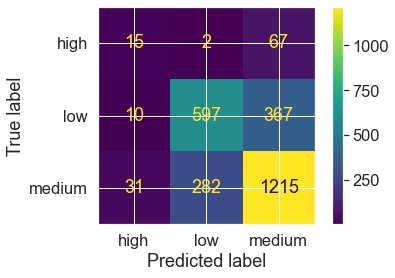

In [146]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, test_x1, test_y1)

In [147]:
test_prob_matrix = knn.predict_proba(test_x1)
print(test_prob_matrix)

test_prob_df = pd.DataFrame(test_prob_matrix)
test_prob1 = pd.DataFrame(test_prob_df.loc[:,1])
print(test_prob1)

[[0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.66666667 0.33333333]
 ...
 [0.         0.66666667 0.33333333]
 [0.         0.66666667 0.33333333]
 [0.         0.         1.        ]]
             1
0     0.000000
1     0.000000
2     0.666667
3     0.333333
4     0.000000
...        ...
2581  0.333333
2582  0.333333
2583  0.666667
2584  0.666667
2585  0.000000

[2586 rows x 1 columns]


### 3.3. Losistic Regression

In [160]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import statsmodels.api as sm

import matplotlib.pylab as plt
import seaborn as sns
import dmba
from dmba import classificationSummary, gainsChart, liftChart

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, roc_curve, auc

#### Fit a Logistic Regression (using all variables except 'qulaity' as feature)

In [171]:
# Define features and target variable
x2 = wine_norm[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y2 = wine_norm['quality_label']

# Partiion data (test_size = 0.40, random_state = 1)
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y2, test_size=0.40, random_state=1)

# Fit a logistic regression to training data
logit = LogisticRegression()
logit.fit(train_x2, train_y2)

# 1 / (1 + e^ -(b0 + b1x))

# To check B0
print(logit.intercept_)

# To check B1
print(logit.coef_)

print(pd.DataFrame({'coeff': logit.coef_[0]}, index=x2.columns))

[-3.4360741   2.13173764  1.30433646]
[[-3.64900017e-01 -1.23334616e+00  6.02579613e-01  6.58343010e-01
  -8.01203991e-01  1.30382352e+00 -1.38040215e-02 -8.40520852e-01
   4.21400866e-01 -1.02997370e-02  4.02946893e+00]
 [-5.43105266e-02  3.84948308e+00  8.11050597e-02 -1.88895550e+00
   7.99033775e-01 -1.62494125e+00  1.00524021e+00  4.20652894e-01
  -5.18005629e-01 -1.23951335e+00 -4.96499539e+00]
 [ 4.19210544e-01 -2.61613691e+00 -6.83684673e-01  1.23061249e+00
   2.17021610e-03  3.21117733e-01 -9.91436185e-01  4.19867958e-01
   9.66047633e-02  1.24981309e+00  9.35526467e-01]]
                         coeff
fixed_acidity        -0.364900
volatile_acidity     -1.233346
citric_acid           0.602580
residual_sugar        0.658343
chlorides            -0.801204
free_sulfur_dioxide   1.303824
total_sulfur_dioxide -0.013804
density              -0.840521
pH                    0.421401
sulphates            -0.010300
alcohol               4.029469


In [190]:
# Predict to get the probabilities
test_pred2 = logit.predict(test_x2)
test_prob2 = logit.predict_proba(test_x2)

test_result2 = pd.DataFrame({'actual': test_y2,
                            'p(0)': [p[0] for p in test_prob2],
                            'p(1)': [p[1] for p in test_prob2],
                            'predicted': test_pred2})

print(test_result2.head())

      actual      p(0)      p(1) predicted
3746     low  0.060078  0.124455    medium
425   medium  0.024941  0.271898    medium
3967     low  0.011596  0.570215       low
6098  medium  0.006340  0.667733       low
3184  medium  0.040613  0.084399    medium


In [191]:
# Classification confusion matrix for test

classificationSummary(test_y2, test_pred2)

Confusion Matrix (Accuracy 0.7030)

       Prediction
Actual    0    1    2
     0    0    8   76
     1    0  541  433
     2    0  251 1277


In [192]:
# Classification confusion matrix for train

train_pred2 = logit.predict(train_x2)
classificationSummary(train_y2, train_pred2)

Confusion Matrix (Accuracy 0.7194)

       Prediction
Actual    0    1    2
     0    0    7  106
     1    0  801  597
     2    0  378 1988


In [193]:
##cutoff value adjustment

# Fit a logistic regression to training data: use C=10
# Use solver='liblinear' for convergence
logit_tune = LogisticRegression(C=0.01, solver='liblinear')
logit_tune.fit(train_x2, train_y2)

print(logit_tune.intercept_)
print(logit_tune.coef_)

print(pd.DataFrame({'coeff': logit_tune.coef_[0]}, index=x2.columns))

[-1.68185305 -0.21442215  0.16583573]
[[-0.49928915 -0.31214023 -0.3070593  -0.13857549 -0.15773649 -0.15645508
  -0.42951971 -0.29755022 -0.6156253  -0.29999551 -0.37812757]
 [ 0.03189123  0.46924297 -0.14550863 -0.00424802  0.15018897 -0.05920255
   0.02628316  0.18856573 -0.10879427 -0.08005051 -1.06912556]
 [-0.01653999 -0.44991108  0.12470466  0.00536428 -0.12944157  0.03773574
  -0.04018002 -0.15220234  0.08204914  0.08561464  0.88041755]]
                         coeff
fixed_acidity        -0.499289
volatile_acidity     -0.312140
citric_acid          -0.307059
residual_sugar       -0.138575
chlorides            -0.157736
free_sulfur_dioxide  -0.156455
total_sulfur_dioxide -0.429520
density              -0.297550
pH                   -0.615625
sulphates            -0.299996
alcohol              -0.378128


In [194]:
test_pred2_1 = logit_tune.predict(test_x2)
test_prob2_1 = logit_tune.predict_proba(test_x2)

In [186]:
classificationSummary(test_y2, test_pred2_1)

Confusion Matrix (Accuracy 0.5909)

       Prediction
Actual    0    1    2
     0    0    0   84
     1    0    0  974
     2    0    0 1528
